In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = 'data/data.csv'
PRODUCTS_PATH = 'data/products.csv'

In [3]:
data =  pd.read_csv(DATA_PATH, sep=',', parse_dates=['doc_date', 'created_at'], low_memory=False)
data.head()

,order_price_without_vat,order_price_with_vat,bill_country,setting_currency_id,created_at,shop_basket_id,doc_date,exchange_currency_rate,source,currency_code,...,catalog_segment_id,categories_ancestor_ids,categories_descendant_ids,category_full_name_path,default_warranty_period,brand_name,brand_parameterized,segment_name,segment_parameterezied,segment_status
0,23.66,28.15,DE,6,2020-04-26 19:47:36.799672,1182444,2020-04-26,1.0000,eshop,EUR,...,3.0,"{1182,1267}",{},"{Bikes,""Cycling accessories"",""Bicycle cleaning...",24.0,Shimano,shimano,Bike,bike,active
1,41.66,49.99,SK,6,2020-04-26 19:28:05.651524,967031,2020-04-26,1.0000,eshop,EUR,...,16.0,{3526},{},"{""LP platne a CD"",""Vinyl Records""}",24.0,Amorphis,amorphis,LPs and CDs,lps-and-cds,inactive
2,307.48,365.90,RO,13,2020-04-26 19:29:29.317773,1182261,2020-04-26,4.8555,eshop,RON,...,1.0,"{3,338,372}",{},"{Music,Drums,Percussions,Darbukas}",24.0,Meinl,meinl,Music,music,active
3,365.55,435.00,RO,13,2020-04-26 20:25:06.976207,1172378,2020-04-26,4.8555,eshop,RON,...,1.0,"{3,4}",{},"{Music,Guitars,""Guitar Training Accessories""}",24.0,D'Addario Planet Waves,d-addario-planet-waves,Music,music,active
4,47157.48,59890.00,HU,10,2022-02-04 14:27:43.222198,4362994,2022-02-04,354.4500,eshop,HUF,...,1.0,"{3,607,608}",{},"{Music,""Studio / PA"",""Studio and Recording"",""U...",24.0,Focusrite,focusrite,Music,music,active


In [4]:
products = pd.read_csv(PRODUCTS_PATH, sep=',')
products.head()

,variant_id,category_id,brand_id,status,is_new,reviews_count,reviews_average_score_price,reviews_average_score_quality,reviews_average_score_properties,reviews_average_score_overall,in_sets_count,is_in_stock,is_returnable,purchase_price,eshop_stock_count,country_of_origin_code,name
0,250796,763.0,16.0,active,f,3,100.0,100.0,100.0,100.0,0,t,t,3.41575,40.0,CN,BSMC300
1,347982,3523.0,7754.0,active,t,0,0.0,0.0,0.0,0.0,0,f,t,82.59000,0.0,US,Regulus LV Red/Black 38
2,241059,2955.0,164.0,active,f,0,0.0,0.0,0.0,0.0,0,t,t,151.96000,2.0,CN,Evolve 30 - Case
3,4908,300.0,15.0,ended,f,2,90.0,100.0,80.0,0.0,0,f,t,NaN,0.0,NaN,RD-300SX
4,256397,1326.0,1576.0,active,f,0,0.0,0.0,0.0,0.0,0,f,t,67.80000,0.0,VN,Sirio 84 Black/White 295


In [5]:
data.dtypes

order_price_without_vat                               float64
order_price_with_vat                                  float64
bill_country                                           object
setting_currency_id                                     int64
created_at                                     datetime64[ns]
shop_basket_id                                          int64
doc_date                                       datetime64[ns]
exchange_currency_rate                                float64
source                                                 object
currency_code                                          object
currency_symbol                                        object
price_round_system                                      int64
basket_total_price_before_discount_with_vat           float64
basket_total_price_with_vat                           float64
count_basket_items                                      int64
basket_count_products                                   int64
basket_t

In [6]:
products.dtypes

variant_id                            int64
category_id                         float64
brand_id                            float64
status                               object
is_new                               object
reviews_count                         int64
reviews_average_score_price         float64
reviews_average_score_quality       float64
reviews_average_score_properties    float64
reviews_average_score_overall       float64
in_sets_count                         int64
is_in_stock                          object
is_returnable                        object
purchase_price                      float64
eshop_stock_count                   float64
country_of_origin_code               object
name                                 object
dtype: object

In [7]:
data.shape

(3659150, 56)

In [8]:
products.shape

(351551, 17)

In [9]:
data.basket_type.unique()

array(['standard', 'express_checkout', 'internal'], dtype=object)

In [10]:
data.isnull().sum()

order_price_without_vat                            0
order_price_with_vat                               0
bill_country                                       0
setting_currency_id                                0
created_at                                         0
shop_basket_id                                     0
doc_date                                          68
exchange_currency_rate                             0
source                                             0
currency_code                                      0
currency_symbol                                    0
price_round_system                                 0
basket_total_price_before_discount_with_vat        0
basket_total_price_with_vat                        0
count_basket_items                                 0
basket_count_products                              0
basket_type                                        0
item_quantity                                      0
item_type                                     

In [11]:
# Dropping all NaNs from the data dataframe, since they are in important columns
data.dropna(inplace=True)

In [12]:
products.isnull().sum()

variant_id                              0
category_id                          7021
brand_id                                2
status                                  0
is_new                                  0
reviews_count                           0
reviews_average_score_price             0
reviews_average_score_quality           0
reviews_average_score_properties        0
reviews_average_score_overall           0
in_sets_count                           0
is_in_stock                             0
is_returnable                           0
purchase_price                      52126
eshop_stock_count                       0
country_of_origin_code              16052
name                                    1
dtype: int64

## **Data.csv insights**

In [13]:
def create_others_value_counts(threshold : float, df : pd.DataFrame, column_name : str) -> pd.Series:
    """
    Function which groups all of the values under threshold into 'others' with preserving of original categories
    Args
        threshold - float in range <0,1> as a threshold for key to be marked as others (desired percentage / 100)
        df - desired DataFrame containing given column
        column_name - string with the exact name of a desired Series
    Returns
        pd.Series - returns Series with the new 'others' group
    """
    
    over_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x > threshold]
    under_thr = df[column_name].value_counts(normalize=True).loc[lambda x : x <= threshold]
    merged_series =  pd.concat([over_thr, pd.Series(under_thr.sum(), index=['others'])])
    return merged_series

In [14]:
# Change all prices to EUR so we can easily compare them, this is one time operation 
non_eur_columns = ['order_price_without_vat', 'order_price_with_vat', 'basket_total_price_before_discount_with_vat', 
                   'basket_total_price_with_vat', 'item_unit_price_with_vat', 'item_unit_price_without_vat', 'item_total_discount_with_vat']

for column_name in non_eur_columns:
    data[column_name] =  round(data[column_name] / data.exchange_currency_rate, 2)

### Shop orders EDA

Median order price with vat 556.08 €
Mean order price with vat 101.02 €


<AxesSubplot:xlabel='order_price_with_vat', ylabel='Count'>

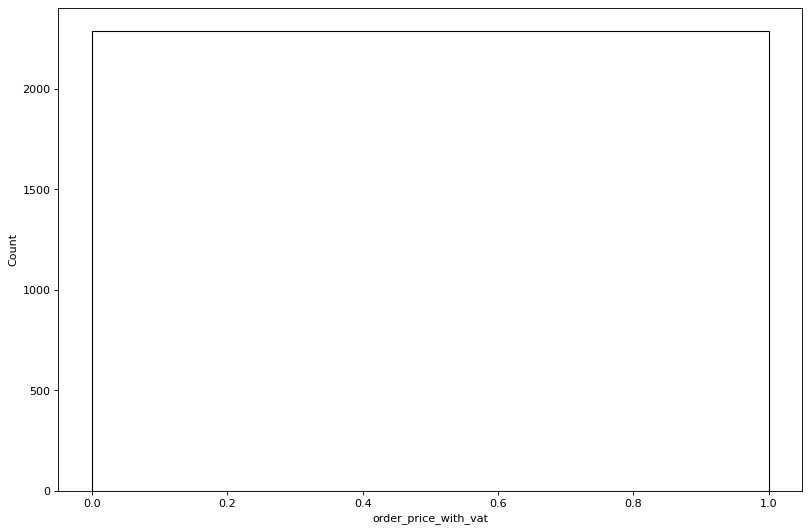

In [25]:
print(f'Median order price with vat {round(data.order_price_with_vat.mean(), 2)} €')
print(f'Mean order price with vat {round(data.order_price_with_vat.median(), 2)} €')
sns.histplot(data.order_price_with_vat, bins=[0,1])

In [16]:
    """
    so.price_without_vat AS order_price_without_vat,  asi nebudem robit, spravim len pre with vat
    so.price_with_vat AS order_price_with_vat,
    so.bill_country,
    so.setting_currency_id,
    so.created_at,
    so.shop_basket_id,
    so.doc_date,
    so.exchange_currency_rate,
    so.source_type AS source,
    """

'\nso.price_without_vat AS order_price_without_vat,  asi nebudem robit, spravim len pre with vat\nso.price_with_vat AS order_price_with_vat,\nso.bill_country,\nso.setting_currency_id,\nso.created_at,\nso.shop_basket_id,\nso.doc_date,\nso.exchange_currency_rate,\nso.source_type AS source,\n'

In [17]:
TODO = list(data.columns)
TODO.remove('bill_country')
TODO.remove('brand_name')
TODO

['order_price_without_vat',
 'order_price_with_vat',
 'setting_currency_id',
 'created_at',
 'shop_basket_id',
 'doc_date',
 'exchange_currency_rate',
 'source',
 'currency_code',
 'currency_symbol',
 'price_round_system',
 'basket_total_price_before_discount_with_vat',
 'basket_total_price_with_vat',
 'count_basket_items',
 'basket_count_products',
 'basket_type',
 'item_quantity',
 'item_type',
 'item_unit_price_with_vat',
 'item_unit_price_without_vat',
 'item_total_discount_with_vat',
 'product_id',
 'product_code',
 'catalog_category_id',
 'catalog_brand_id',
 'product_name',
 'product_status',
 'reviews_count',
 'reviews_average_score_price',
 'reviews_average_score_quality',
 'reviews_average_score_properties',
 'reviews_average_score_overall',
 'reviews_average_score',
 'is_in_stock',
 'is_ended',
 'is_new',
 'is_boosted',
 'product_purchase_price',
 'eshop_stock_count',
 'is_fifo',
 'product_name_parameterize',
 'category',
 'tree_path',
 'category_name_parameterized',
 'categ

In [18]:
# calculate how many brands there are as well as the most common
print(data.brand_name.value_counts())

Muziker                          375479
Fender                           149106
Dunlop                           103696
Soundking                         80601
Behringer                         64434
                                  ...  
Great News                            1
Elevators To The Grateful Sky         1
Toledo Steel                          1
Avalanche Party                       1
Joe Beard                             1
Name: brand_name, Length: 5368, dtype: int64


In [19]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.facecolor'] = 'FFFFFF'
plt.rcParams['legend.facecolor'] = 'FFFFFF'
plt.rcParams['patch.facecolor'] = 'FFFFFF'
# figure().patch.set_facecolor('white')

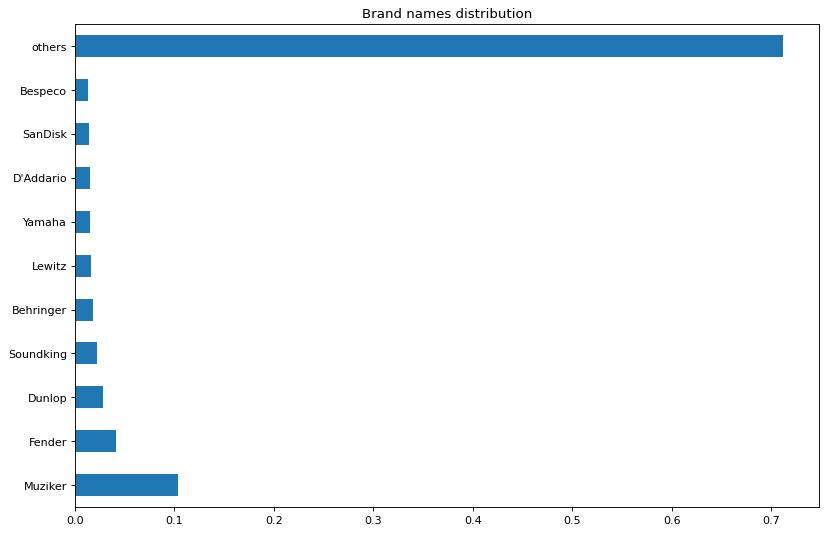

In [20]:
counted_countries = create_others_value_counts(0.01, data, 'brand_name') 
counted_countries.plot(kind='barh', title='Brand names distribution')
plt.show()

As we can see above, there is HUGE variety of brands in products (3185) with only 12 of them having more than 1% of products.

Percentage of bill countries, with the threshold of 0.5% to be shown as bill country of an order.

Bill countries in data: ['DE' 'SK' 'RO' 'HU' 'GB' 'PL' 'CZ' 'HR' 'BE' 'PT' 'FR' 'IT' 'BG' 'AT'
 'SI' 'ES' 'SE' 'DK' 'EL' 'NL' 'IE' 'FI' 'LU' 'LV' 'EE' 'LT' 'CH' 'GR'
 'TR' 'BA' 'UA' 'RS'].
 That is 32 countries as bill countries.


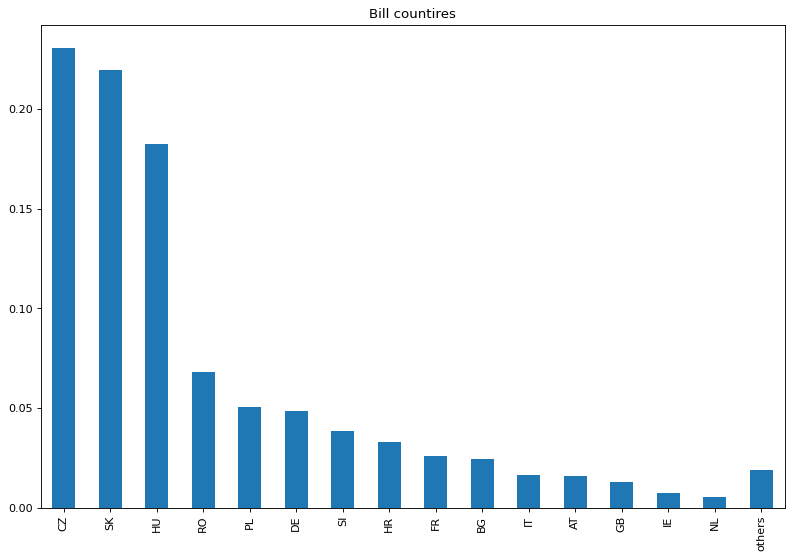

In [21]:
print(f'Bill countries in data: {data.bill_country.unique()}.\n That is {len(data.bill_country.unique())} countries as bill countries.')

figure().patch.set_facecolor('white')
counted_countries = create_others_value_counts(0.005, data, 'bill_country') 
counted_countries.plot(kind='bar', title='Bill countires')
plt.show()

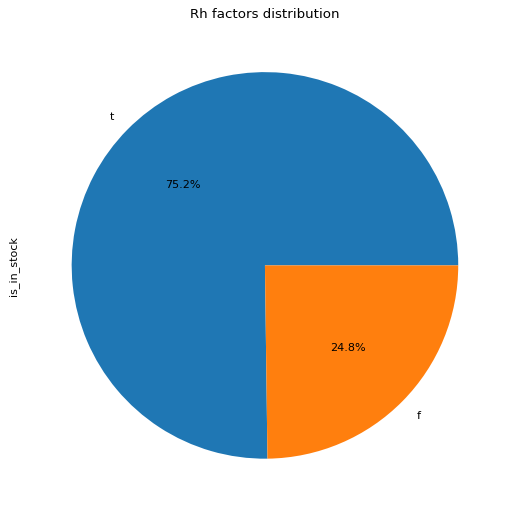

In [22]:
figure().patch.set_facecolor('white')
data.is_in_stock.value_counts().plot(kind='pie', title='Rh factors distribution', autopct='%1.1f%%')
plt.show()

In [23]:
"""
TODO preratat sumy na Eura vsade, zaokruhlit


"""

'\nTODO preratat sumy na Eura vsade, zaokruhlit\n\n\n'

In [24]:
"""
Poznamky

Kosiky sa pouzivaju len pri novom eshope. Na data o starom eshope pouzivam invoices - iba pre typ old eshop. To potom zlucujem dokopy.

"""

'\nPoznamky\n\nKosiky sa pouzivaju len pri novom eshope. Na data o starom eshope pouzivam invoices - iba pre typ old eshop. To potom zlucujem dokopy.\n\n'